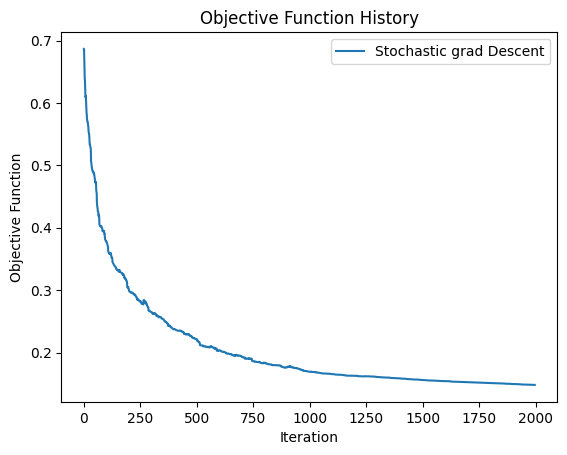

How many days were misclassed without modification?
misclassified days (Full grad Descent): 16
misclassified days (Stochastic grad Descent): 9


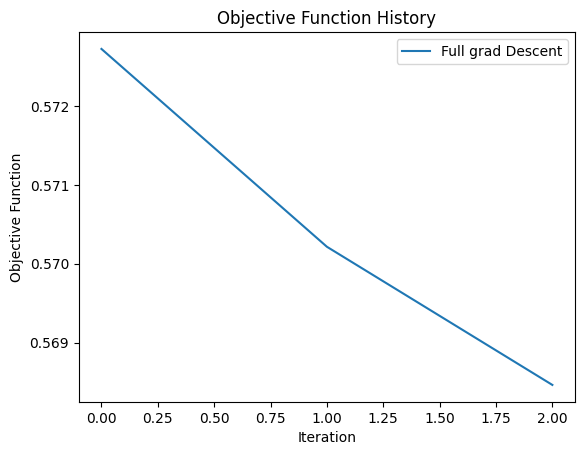

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

smarket = pd.read_csv('smarket.csv')  # load the dataset
# Convert 'Direction' to binary labels
smarket['Direction'] = np.where(smarket['Direction'] == 'Up', 1, 0)

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# full grad.
def fullgrad(w, X, y):
    m=len(y)
    z = np.dot(X, w)
    grad = (1/m)*np.dot(X.T, sigmoid(z) - y)
    return grad

# stochastic grad fn.
def randgrad(w, X, y, n):
    z = np.dot(X[n], w)
    grad = np.dot(X[n].T, sigmoid(z) - y[n])
    return grad

# grad descent fn.
def fdescent(X, y, job, nEpoch):
    N = len(y)
    d = X.shape[1]
    w = np.zeros(d)
    f_history = []

    def rho(t):
        return 1 / np.sqrt(t)

    if job == 'stochastic':
        for epoch in range(nEpoch):
            perm = np.random.permutation(N)
            for i in perm:
                grad = randgrad(w, X, y, i)
                lr = rho(epoch * N + i + 1)
                w -= lr * grad
                f = -np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w))))
                f_history.append(f)
    elif job == 'full':
        for epoch in range(nEpoch):
            grad = fullgrad(w, X, y)
            lr = rho(epoch * N + 1)
            w -= lr * grad
            f = -np.mean(y * np.log(sigmoid(np.dot(X, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(X, w))))
            f_history.append(f)

    return w, f_history

X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Today', 'Volume']].values
y = smarket['Direction'].values

# Split data into train and test sets
X_train = smarket.loc[smarket['Year'] < 2005, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today', 'Volume']].values
y_train = smarket.loc[smarket['Year'] < 2005, 'Direction'].values
X_test = smarket.loc[smarket['Year'] == 2005, ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today', 'Volume']].values
y_test = smarket.loc[smarket['Year'] == 2005, 'Direction'].values

# Add bias term
X_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training for full grad descent
w_full, f_history_full = fdescent(X_train, y_train, 'full', 3)

# Training for stochastic grad descent
w_stochastic, f_history_stochastic = fdescent(X_train, y_train, 'stochastic', 2)

# Plot histories of the objective function
plt.plot(f_history_stochastic, label='Stochastic grad Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Objective Function History')
plt.legend()
plt.show()

# to predict probabilities and classifiers
def predict(X, w):
    probabilities = sigmoid(np.dot(X, w))
    classifiers = np.round(probabilities)
    return probabilities, classifiers

# Predict using full grad descent
probabilities_full, classifiers_full = predict(X_test, w_full)

# Predict using stochastic grad descent
probability_stochastic, classifiers_stochastic = predict(X_test, w_stochastic)

# Create table of predictions and actual directions
predictions_table = pd.DataFrame({
    'Probabilities (Full grad Descent)': probabilities_full,
    'Classifiers (Full grad Descent)': classifiers_full,
    'Probabilities (Stochastic grad Descent)': probability_stochastic,
    'Classifiers (Stochastic grad Descent)': classifiers_stochastic,
    'Actual Direction': y_test
})

# Count misclassed days
misclassed_full = np.sum(classifiers_full != y_test)
misclassed_stochastic = np.sum(classifiers_stochastic != y_test)
print("How many days were misclassed without modification?")
print("misclassified days (Full grad Descent):", misclassed_full)
print("misclassified days (Stochastic grad Descent):", misclassed_stochastic)

plt.plot(f_history_full, label='Full grad Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Objective Function History')
plt.legend()
plt.show()

In [ ]:
print("final w-vector for type-full is : ")
w_full

final w-vector for type-full is : 


array([ 0.        , -0.01732081, -0.013779  ,  0.00330878,  0.00289544,
       -0.00087664,  0.38481236, -0.00838397])

In [ ]:
# Modify the dataset for predicting the direction of the following day
smarket_modified = smarket.shift(-1)
smarket_modified.dropna(inplace=True)
X_modified = smarket_modified[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5','Today', 'Volume']].values
X_modified = np.hstack((np.ones((len(X_modified), 1)), X_modified))  # Add bias term
y_modified = smarket_modified['Direction'].values

# Standardize features
X_modified = scaler.transform(X_modified)

# Predict using full grad descent
probabilities_full_modified, classifiers_full_modified = predict(X_modified, w_full)

# Predict using stochastic grad descent
probabilities_stochastic_modified, classifiers_stochastic_modified = predict(X_modified, w_stochastic)

# Create table of predictions and actual directions for modified dataset
predictions_table_modified = pd.DataFrame({
    'Probability (Full grad Descent, Modified)': probabilities_full_modified,
    'Classifier (Full grad Descent, Modified)': classifiers_full_modified,
    'Probability (Stochastic grad Descent, Modified)': probabilities_stochastic_modified,
    'Classifier (Stochastic grad Descent, Modified)': classifiers_stochastic_modified,
    'Actual Direction (Modified)': y_modified
})

# Count misclassed days for modified dataset
misclassed_full_modified = np.sum(classifiers_full_modified != y_modified)
misclassed_stochastic_modified = np.sum(classifiers_stochastic_modified != y_modified)

print("How many days were misclassed with modification?")
print("misclassified days (Full grad Descent, Modified):", misclassed_full_modified)
print("misclassified days (Stochastic grad Descent, Modified):", misclassed_stochastic_modified)


How many days were misclassed with modification?
misclassified days (Full Gradient Descent, Modified): 39
misclassified days (Stochastic Gradient Descent, Modified): 15


In [ ]:
predictions_table

,Probabilities (Full Gradient Descent),Classifiers (Full Gradient Descent),Probabilities (Stochastic Gradient Descent),Classifiers (Stochastic Gradient Descent),Actual Direction
0,0.442163,0.0,0.029810,0.0,0
1,0.411553,0.0,0.006186,0.0,0
2,0.475113,0.0,0.157589,0.0,0
3,0.528433,1.0,0.804496,1.0,1
4,0.485748,0.0,0.316332,0.0,0
...,...,...,...,...,...
247,0.496755,0.0,0.528904,1.0,1
248,0.425345,0.0,0.015286,0.0,0
249,0.512472,1.0,0.630678,1.0,1
250,0.478681,0.0,0.228182,0.0,0


In [ ]:
predictions_table_modified

,"Probabilities (Full Gradient Descent, Modified)","Classifiers (Full Gradient Descent, Modified)","Probabilities (Stochastic Gradient Descent, Modified)","Classifiers (Stochastic Gradient Descent, Modified)",Actual Direction (Modified)
0,0.574816,1.0,0.986483,1.0,1.0
1,0.445366,0.0,0.056439,0.0,0.0
2,0.548802,1.0,0.936979,1.0,1.0
3,0.518678,1.0,0.763937,1.0,1.0
4,0.605041,1.0,0.997782,1.0,1.0
...,...,...,...,...,...
1244,0.496755,0.0,0.528904,1.0,1.0
1245,0.425345,0.0,0.015286,0.0,0.0
1246,0.512472,1.0,0.630678,1.0,1.0
1247,0.478681,0.0,0.228182,0.0,0.0


In [ ]:
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,1
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,1
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,0
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,1
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,0


In [ ]:
X_train

array([[ 0.        ,  0.30921304, -0.15683598, ...,  4.03170078,
         0.77994781, -0.65857332],
       [ 0.        ,  0.77949523,  0.30937228, ..., -0.85076225,
         0.83934581, -0.26527702],
       [ 0.        ,  0.83889073,  0.77964868, ..., -2.11384295,
        -0.50727993,  0.16353558],
       ...,
       [ 0.        ,  0.5809678 , -0.35129283, ...,  0.72627733,
        -0.00605851, -1.43731494],
       [ 0.        , -0.00647812,  0.5811237 , ...,  0.27385455,
         0.00614656, -1.6507866 ],
       [ 0.        ,  0.00572644, -0.00631498, ...,  0.03556781,
        -0.10939474, -2.01006202]])

In [ ]:
X_test

array([[ 0.        , -0.10981002,  0.00588942, ..., -0.34842805,
        -0.66106378, -2.17044615],
       [ 0.        , -0.66145591, -0.10964561, ...,  0.57412803,
        -0.94991703,  0.53589595],
       [ 0.        , -0.95029704, -0.66128471, ..., -0.0070984 ,
        -0.29572543,  1.32174083],
       ...,
       [ 0.        , -0.777806  ,  0.03436636, ..., -0.02078378,
         0.10541444,  0.64681896],
       [ 0.        ,  0.10499015, -0.77763336, ...,  0.2014025 ,
        -0.24283681,  0.20525788],
       [ 0.        , -0.24324648,  0.10515191, ...,  0.33825637,
        -0.398248  ,  0.0563885 ]])

In [ ]:
smarket.drop(columns='Year',inplace=True)
smarket.to_csv('update_data.csv' , index=False)
updat_smarket=pd.read_csv('update_data.csv')

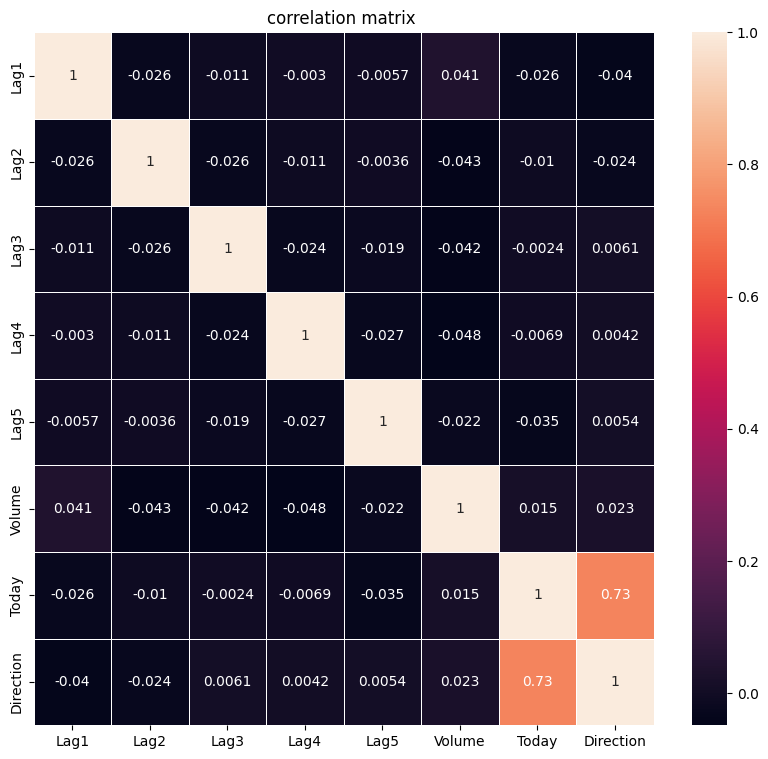

In [ ]:
#correlation matrix

correlation=updat_smarket.corr()

import seaborn as sns

plt.figure(figsize=(10,9))
sns.heatmap(correlation,annot=True ,linewidths=0.6 )
plt.title("correlation matrix ")
plt.show()

In [ ]:
correlation

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


Q2. Which methods gives better results and which method uses fewer floating point operations?


Answer : Stochastic grad Descent demonstrates superior performance over Full grad Descent with notably fewer misclassifications observed on the test set. Thus, given this dataset and configuration, Stochastic grad Descent yields more favorable outcomes.


Regarding floating-point operations:

Stochastic grad Descent typically requires fewer floating-point operations per iteration relative to Full grad Descent since it calculates the grad for individual data points rather than the entire dataset. Nonetheless, it's worth noting that Full grad Descent might converge in fewer iterations.

Q1. Which variables show a significant correlation?


Answer : From correlation matrix , realtion between  Today Vs direction has greater impact than others.

Q3. Is this a get rich quick scheme?

Answer: The code provided isn't a shortcut to quick wealth. It's crucial to acknowledge that investing in stocks carries inherent risks, and there's no guarantee of instant success or riches with any algorithm. Predictive models, including those leveraging machine learning techniques, serve as aids in decision-making, but they should be approached with caution. It's advisable to complement algorithmic insights with thorough fundamental analysis, market research, and robust risk management strategies.